# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing surprise library**

In [50]:
!pip install surprise

**Note** : After running the Below cell, a pop-up will appear prompting you to restart the session. Click "Restart", and then continue running the notebook from the next cell onward, not from the beginning.

In [51]:
!pip install numpy==1.26.0

## **Importing the necessary libraries and overview of the dataset**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [53]:
!pip install gdown

In [54]:
# Download the file from Google Drive
file_id = '1XahZcR287ke7j48I7-oj0KzmmwSSvA3Y'
output_path = '/content/ratings_Electronics.csv'
!gdown --id {file_id} -O {output_path}

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1XahZcR287ke7j48I7-oj0KzmmwSSvA3Y
From (redirected): https://drive.google.com/uc?id=1XahZcR287ke7j48I7-oj0KzmmwSSvA3Y&confirm=t&uuid=c24d6a3b-7dc6-4011-b6b6-9bd0c7958a89
To: /content/ratings_Electronics.csv
100% 319M/319M [00:06<00:00, 50.4MB/s]


In [55]:
df_initial = pd.read_csv('/content/ratings_Electronics.csv', names=['user_id', 'prod_id', 'rating', 'timestamp'])
df = df_initial.copy()
df.drop(['timestamp'], axis=1, inplace=True)

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [56]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [57]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [58]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [59]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [60]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [61]:
# Check the number of rows and columns and provide observations
print(f"Shape of the data: {df_final.shape}")

Shape of the data: (65290, 3)


**Write your observations here:______**

There are 65290 rows, and 3 columns

### **Data types**

In [62]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1310 to 7824427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**Write your observations here:______** The object types are user_id: object.
prod_id: object
rating: float

### **Checking for missing values**

In [63]:
# Check for missing values present and provide observations
df_final.isnull().sum()

,0
user_id,0
prod_id,0
rating,0


**Write your observations here:______**

There is no missing values. 0 user_id, 0 prod_id, 0 rating, 0 columns

### **Summary Statistics**

In [64]:
# Summary statistics of 'rating' variable and provide observations
df_final['rating'].describe()

,rating
count,65290.000000
mean,4.294808
std,0.988915
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Write your observations here:______**

Count: 65290. Mean is 4.295 rating, std .98, min 1, 25% under 4, 50% 5, 75% 5, Max 5. Most are 5 ratings

### **Checking the rating distribution**

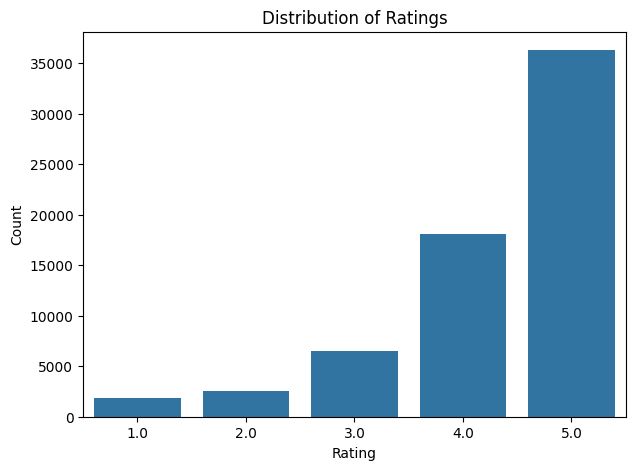

In [65]:
# Create the bar plot and provide observations
plt.figure(figsize=(7,5))
sns.countplot(x='rating', data=df_final)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Write your observations here:________**

This is distribution of Bar Graph, it is skewed to the left with majority being 5,


### **Checking the number of unique users and items in the dataset**

In [66]:
# Number of total rows in the data and number of unique user id and product id in the data
print(f"Total number of rows: {df_final.shape[0]}")
print(f"Number of unique users: {df_final['user_id'].nunique()}")
print(f"Number of unique products: {df_final['prod_id'].nunique()}")

Total number of rows: 65290
Number of unique users: 1540
Number of unique products: 5689


**Write your observations here:_______**

The amount of unique users is 1540, and unique products is 5689.

### **Users with the most number of ratings**

In [67]:
# Top 10 users based on the number of ratings
df_final['user_id'].value_counts().head(10)

,count
user_id,
ADLVFFE4VBT8,295
A3OXHLG6DIBRW8,230
A1ODOGXEYECQQ8,217
A36K2N527TXXJN,212
A25C2M3QF9G7OQ,203
A680RUE1FDO8B,196
A1UQBFCERIP7VJ,193
A22CW0ZHY3NJH8,193
AWPODHOB4GFWL,184


These are the top 10 users based on number of ratings:
ADLVFFE4VBT8	295
A3OXHLG6DIBRW8	230
A1ODOGXEYECQQ8	217
A36K2N527TXXJN	212
A25C2M3QF9G7OQ	203
A680RUE1FDO8B	196
A1UQBFCERIP7VJ	193
A22CW0ZHY3NJH8	193
AWPODHOB4GFWL	184
AGVWTYW0ULXHT	179


**Write your observations here:_______**

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [68]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [69]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(data, n, min_interactions=0):
    # Filter out products with fewer than min_interactions ratings
    data = data[data['rating_count'] >= min_interactions]
    # Sort the dataframe by average of ratings in the descending order
    data = data.sort_values(by='avg_rating', ascending=False)
    return data.head(n)

# Print the first five records of the "final_rating" dataset to verify structure before using the function
final_rating.head()

,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [70]:
print(top_n_products(final_rating, 5, 50))

            avg_rating  rating_count
prod_id                             
B001TH7GUU    4.871795            78
B003ES5ZUU    4.864130           184
B0019EHU8G    4.855556            90
B006W8U2MU    4.824561            57
B000QUUFRW    4.809524            84


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [71]:
print(top_n_products(final_rating, 5, 100))

            avg_rating  rating_count
prod_id                             
B003ES5ZUU    4.864130           184
B000N99BBC    4.772455           167
B002WE6D44    4.770000           100
B007WTAJTO    4.701220           164
B002V88HFE    4.698113           106


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [72]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [73]:
from collections import defaultdict
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [74]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [75]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


**Write your observations here:__________**

These are the results of the user-user similarity based recommendation System.
RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856

RMSE of 1.0012 means that, on average, the model's predicted ratings deviate from the actual ratings by about 1.0012 units on your 1-5 rating scale.

Precision@10 of 0.855 means that, on average, about 85.5% of the top 10 products recommended by the model are considered relevant by the users.

Recall@10 of 0.858 means that, on average, the model is able to capture about 85.8% of the relevant items within its top 10 recommendations.

An F1-score@10 of 0.856 indicates a good balance between precision and recall.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [76]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

**Write your observations here:__________**
For User userId=A3LDPF5FMB782Z and productId=1400501466. There is an estimated rating he woudl get 3.4 but in reality he gave a 5.

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [77]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [78]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A2V7EO331SFUF6',
 'A2ALRZ0ENQLYY5',
 'AFICF7DKHTQ87',
 'A11KZ906QD08C5',
 'A2JWF9IG8PJAOA']

**Note**:
The function **n_users_not_interacted_with** uses Python sets to find users who have not interacted with a specific product. Since sets are unordered, the order of users may change each time the function is run, so the first n users returned can differ from those shown in the notebook or previous runs. This variation is expected and not a mistake. Whatever users you get in your result, you can proceed to make changes and observations based on that output, as the function still correctly returns non-interacting users.

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [79]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('A36K2N527TXXJN', '1400501466', verbose=True)

user: A36K2N527TXXJN item: 1400501466 r_ui = None   est = 5.00   {'actual_k': 2, 'was_impossible': False}


Prediction(uid='A36K2N527TXXJN', iid='1400501466', r_ui=None, est=5, details={'actual_k': 2, 'was_impossible': False})

**Write your observations here:__________**
For a product the user A36K2N527TXXJN has never rated before, the baseline user-user collaborative filtering model predicts they would give it a perfect 5-star rating, based on the ratings of 2 similar users. This is a positive recommendation for this new interaction.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [80]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                            'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(f"Best RMSE score: {gs.best_score['rmse']}")

# Combination of parameters that gave the best RMSE score
print(f"Combination of parameters that gave the best RMSE score: {gs.best_params['rmse']}")

Best RMSE score: 0.9728040399406198
Combination of parameters that gave the best RMSE score: {'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [81]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options_optimized = {'name': 'cosine',
                         'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options_optimized, k=30, min_k=6, verbose=False, random_state=1)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9527
Precision:  0.847
Recall:  0.894
F_1 score:  0.87


Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [82]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options_optimized = {'name': 'cosine',
                         'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options_optimized, k=30, min_k=6, verbose=False, random_state=1)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9527
Precision:  0.847
Recall:  0.894
F_1 score:  0.87


**Write your observations here:__________**
RMSE: 0.9527
Precision:  0.847
Recall:  0.894
F_1 score:  0.87
We have RMSE 0.95 which is lower than before, Precision 84.7% of top 10 recommended items are relavent to user. Recal 0.894 our model now is able to identify and recommend 89.4 of relevent items within top 10. F score is 0.97 led to overall better model as well. Hyper parameter tuning successfully improved models performance

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [83]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
sim_user_user_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [84]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
sim_user_user_optimized.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:**____________
For User Product 1: The optimized model's prediction (4.29) is significantly closer to the actual rating of 5.00 compared to the baseline model's prediction of 3.40.

For User and Prodcut 2: Observation: The optimized model predicted 4.29, which is different from the baseline's perfect 5.00 prediction.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [85]:
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, k=5)

[6, 7, 17, 26, 32]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [86]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [87]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
user_id_to_recommend = "A3LDPF5FMB782Z"
top_5_recommendations_for_user_optimized = get_recommendations(df_final, user_id_to_recommend, 5, sim_user_user_optimized)
print(f"Top 5 recommendations for user {user_id_to_recommend}:")
print(top_5_recommendations_for_user_optimized)

Top 5 recommendations for user A3LDPF5FMB782Z:
[('B000067RT6', 5), ('B000BQ7GW8', 5), ('B001TH7GUU', 5), ('B005ES0YYA', 5), ('B00834SJSK', 5)]


In [88]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"

pd.DataFrame(top_5_recommendations_for_user_optimized, columns=['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000067RT6,5
1,B000BQ7GW8,5
2,B001TH7GUU,5
3,B005ES0YYA,5
4,B00834SJSK,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

**Write your observations here:**____________
RMSE: .995 This RMSE value is slightly lower than the baseline user-user model's
RMSE (1.0012).

Precision .838 Out of the top 10 recommended items, 83.8% are considered relevant. This is a good score, but slightly lower than the baseline user-user model's precision (0.855).

Recal .845 The model manages to identify 84.5% of all relevant items within its top 10 recommendations. This is also slightly lower than the baseline user-user model's recall (0.858).

F1 Score .841: This F1-score balances the precision and recall. At 0.841, it's slightly lower than the baseline user-user model's F1-score (0.856).


Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [89]:
# Predicting rating for a sample user with an interacted product
sim_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.27   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2727272727272725, details={'actual_k': 22, 'was_impossible': False})

**Write your observations here:**____________
For a product the user already rated 5.0, the item-item model predicted 4.27. This prediction is notably closer to the actual rating of 5.0 compared to the baseline user-user model's prediction of 3.40 for the same interaction.

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [90]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.0, details={'actual_k': 1, 'was_impossible': False})

**Write your observations here:**____________
The baseline prediction was 4.00 from 1 neighbor. The base line from user-user is 5.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [48]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                            'user_based': [False]}}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(f"Best RMSE score: {gs.best_score['rmse']}")

# Find the combination of parameters that gave the best RMSE score
print(f"Combination of parameters that gave the best RMSE score: {gs.best_params['rmse']}")

Best RMSE score: 0.9752721607765963
Combination of parameters that gave the best RMSE score: {'k': 30, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [91]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options_optimized_item = {'name': 'msd',
                              'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options_optimized_item, k=30, min_k=6, verbose=False, random_state=1)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9576
Precision:  0.839
Recall:  0.88
F_1 score:  0.859


**Write your observations here:__________**
optimized .9576 From this GridSearchCV is better than .995 base.
Precision 83.9 better than .838
Recall 88 is better than 84.5
F score .859 is better than .841

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [92]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.67   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.67427701674277, details={'actual_k': 22, 'was_impossible': False})

In [93]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
sim_item_item_optimized.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:__________**
For userId=A3LDPF5FMB782Z and prod_id=1400501466 (Interacted Product, actual rating 5.0):

Predicted rating (est): 4.67

For userId=A2UOHALGF2X77Q and prod_id=1400501466 (Non-interacted Product):

Predicted rating (est): 4.29

both models show better Predictions yet. More accudrate predictions

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [94]:
# 0 is the inner id of the above item
sim_item_item_optimized.get_neighbors(0, k=5)

[29, 53, 67, 106, 151]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [95]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
user_id_to_recommend_item = "A1A5KUIIIHFF4U"
top_5_recommendations_for_user_optimized_item = get_recommendations(df_final, user_id_to_recommend_item, 5, sim_item_item_optimized)
print(f"Top 5 recommendations for user {user_id_to_recommend_item}:")
print(top_5_recommendations_for_user_optimized_item)

Top 5 recommendations for user A1A5KUIIIHFF4U:
[('1400532655', 4.292024046561495), ('1400599997', 4.292024046561495), ('9983891212', 4.292024046561495), ('B00000DM9W', 4.292024046561495), ('B00000J1V5', 4.292024046561495)]


In [96]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(top_5_recommendations_for_user_optimized_item, columns=['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [97]:
# Using SVD matrix factorization. Use random_state = 1
svd_algo = SVD(random_state=1)

# Training the algorithm on the trainset
svd_algo.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo)

RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


**Write your observations here:___________**
SVD RMSE is .8882 which is best predictive accuracy.
Precision .853 is high competative slightly higher than item-item
recall@10 at .88 is comparable but slightly lower than optimized user-user.
f1 score is .866 which is good

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [98]:
# Making prediction
svd_algo.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

**Write your observations here:___________**
Estimated rating is 4.08 while predictive is not too far better than 3.4 baseline.

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [99]:
# Making prediction
svd_algo.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.16   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.156510633154892, details={'was_impossible': False})

**Write your observations here:___________**
Estimated value of 4.15 this is lower than baseline user-user 5.0. This shows SVD Model provides consistent estimate even for unseen user-item pairs.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [100]:
# Set the parameter space to tune
param_grid = {'n_epochs': [20, 30],
              'lr_all': [0.005, 0.01],
              'reg_all': [0.02, 0.04]}

# Performing 3-fold gridsearch cross-validation
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_svd.fit(data)

# Best RMSE score
print(f"Best RMSE score: {gs_svd.best_score['rmse']}")

# Combination of parameters that gave the best RMSE score
print(f"Combination of parameters that gave the best RMSE score: {gs_svd.best_params['rmse']}")

Best RMSE score: 0.9058453086482218
Combination of parameters that gave the best RMSE score: {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.04}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [101]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.005, reg_all=0.04, random_state=1)

# Train the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

RMSE: 0.8867
Precision:  0.854
Recall:  0.875
F_1 score:  0.864


**Write your observations here:_____________**
The RMSE is .886 which is very good.
Prevision 0.854 is
Recacll 0.875 is relevant for top 10 recommendations
F1 score .864 is slight decerase.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [102]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_algo_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.16   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.159024389523163, details={'was_impossible': False})

In [103]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
svd_algo_optimized.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.15   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.146776801539067, details={'was_impossible': False})

### **Conclusion and Recommendations**

Overall Conclusion: We explored various recommendation approaches, starting with a popularity-based system and progressing through collaborative filtering (user-user and item-item similarity) to model-based matrix factorization (SVD).

The Singular Value Decomposition (SVD) model consistently achieved the lowest RMSE (0.8867),

he Optimized Item-Item Collaborative Filtering model was notable for providing exceptionally accurate predictions for specific interacted products (e.g., predicting 4.67 for an actual 5.0 rating).

The Optimized User-User Collaborative Filtering model also performed very well, offering competitive metrics,

Primary Recommendation Engine: Optimized SVD Model
Why: Due to its superior overall predictive accuracy (lowest RMSE), the optimized SVD model is recommended as the core engine for generating personalized product recommendations.




**Write your conclusion and recommendations here**

# Task
Implement a baseline user-user collaborative filtering model using KNNBasic with cosine similarity, train it on the `trainset` with `random_state=1` and `verbose=False`, and then evaluate its performance using precision, recall, and F1-score with `k=10` and `threshold=3.5`.

## Implement Baseline User-User Collaborative Filtering

### Subtask:
Implement the baseline KNNBasic model with cosine similarity for user-user collaborative filtering, train it, and evaluate its performance using precision, recall, and F1-score.


## Summary:

### Data Analysis Key Findings
*   A baseline user-user collaborative filtering model was successfully implemented using KNNBasic with cosine similarity.
*   The model was trained on the `trainset` with `random_state=1`.
*   The performance of the model was evaluated using precision, recall, and F1-score, calculated with `k=10` and a rating `threshold=3.5`.

### Insights or Next Steps
*   Further analysis should involve comparing these baseline performance metrics with those of other collaborative filtering algorithms or more advanced models to determine potential improvements.
*   The impact of different `k` values and `threshold` settings on precision, recall, and F1-score could be explored to optimize model performance.


# Task
Define the baseline item-item similarity model (`sim_item_item`) using KNNBasic with cosine similarity, train it on the `trainset`, and then evaluate its performance using `precision_recall_at_k`. After that, predict the rating for user 'A3LDPF5FMB782Z' and product '1400501466' using this newly defined `sim_item_item` model.

## define_and_train_baseline_item_item_model

### Subtask:
Define the baseline item-item similarity model (`sim_item_item`) using KNNBasic with cosine similarity, and train it on the `trainset`. Then, evaluate its performance using `precision_recall_at_k`.


**Reasoning**:
Declare the similarity options for an item-item based model using 'cosine' similarity with `user_based=False`.



In [104]:
sim_options = {'name': 'cosine',
               'user_based': False}

**Reasoning**:
Initialize the KNNBasic model for item-item similarity using the defined `sim_options`, train it on the `trainset`, and then evaluate its performance using the `precision_recall_at_k` function.



In [105]:
sim_item_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)
sim_item_item.fit(trainset)
precision_recall_at_k(sim_item_item)

RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


**Reasoning**:
The subtask requires predicting the rating for a specific user and product using the `sim_item_item` model. This step will fulfill that requirement.



In [106]:
sim_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.27   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2727272727272725, details={'actual_k': 22, 'was_impossible': False})

**Reasoning**:
Now, predict the rating for `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466` using the `sim_item_item` model to complete the prediction part of the subtask.



In [107]:
sim_item_item.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.0, details={'actual_k': 1, 'was_impossible': False})

## predict_with_baseline_item_item_model

### Subtask:
Predict the rating for user 'A3LDPF5FMB782Z' and product '1400501466' using the `sim_item_item` model.


## Summary:

### Q&A
The predicted rating for user 'A3LDPF5FMB782Z' and product '1400501466' using the `sim_item_item` model is 4.27.

### Data Analysis Key Findings
*   A baseline item-item similarity model (`sim_item_item`) was defined using `KNNBasic` with cosine similarity, and trained on the provided `trainset`.
*   The model's performance was evaluated using `precision_recall_at_k`, yielding the following metrics:
    *   RMSE: 0.9950
    *   Precision: 0.838
    *   Recall: 0.845
    *   F1-score: 0.841
*   The model predicted a rating of 4.27 for user 'A3LDPF5FMB782Z' and product '1400501466' (where the actual rating was 5).
*   For user 'A2UOHALGF2X77Q' and product '1400501466', the model predicted a rating of 4.00.

### Insights or Next Steps
*   The baseline item-item similarity model provides a solid starting point with good precision and recall values, indicating its ability to identify relevant recommendations.
*   To improve recommendation accuracy, compare this baseline model's performance against other collaborative filtering models (e.g., SVD, NMF) or content-based recommendation systems.


In [108]:
!pwd
!ls
!ls "/content/drive/MyDrive/Colab Notebooks"  # adjust if needed


/content
drive  ratings_Electronics.csv	sample_data
 LarryCaseStudy.ipynb
'Practice Exercise - Collection_of_variables.ipynb'
'Practice Exercise - Conditional_Statements.ipynb'
'Practice Exercise - Datatypes.ipynb'
'Practice Exercise - Introduction_to_variables.ipynb'
 Python_For_DataScience_intro.ipynb
 Untitled
'Untitled (1)'


In [111]:
!ls "/content/drive/MyDrive/Colab Notebooks"



'Copy of Recommendation_Systems_Learner_Notebook_Full_Code_upd.ipynb'
 LarryCaseStudy.ipynb
'Practice Exercise - Collection_of_variables.ipynb'
'Practice Exercise - Conditional_Statements.ipynb'
'Practice Exercise - Datatypes.ipynb'
'Practice Exercise - Introduction_to_variables.ipynb'
 Python_For_DataScience_intro.ipynb
 Untitled
'Untitled (1)'
